In [524]:
import numpy as np
import pandas as pd
from sklearn.datasets._samples_generator import make_blobs, make_moons
from sklearn.neighbors import NearestNeighbors
from math import dist
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

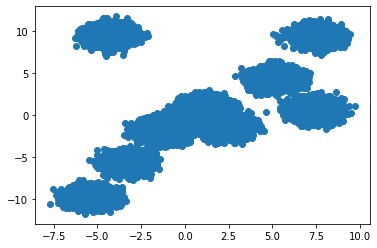

In [525]:
# X, y = make_blobs(n_samples=1000, centers=20, cluster_std=0.5, random_state=10)
X, y = make_blobs(n_samples=40000, centers=10, cluster_std=0.60, random_state=8)
# X, y = make_moons(n_samples=1000, noise=0.1)
plt.scatter(X[:, 0], X[:, 1])

In [526]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan',
          'navy', 'red', 'blue', 'green']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [527]:
min_pts = int(len(X)/200)

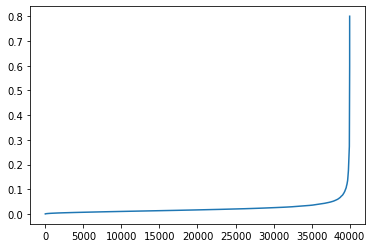

In [528]:
neigh = NearestNeighbors(n_neighbors=min_pts)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

In [529]:
X

array([[ 2.09926275, -1.03189874],
       [-3.67600986, -6.2329457 ],
       [-3.27569677,  9.84368378],
       ...,
       [-0.72476978, -1.73101656],
       [ 2.07320804, -1.96862403],
       [ 7.7494726 ,  0.88925449]])

In [530]:
distances

array([8.22046694e-05, 8.22046694e-05, 1.60230177e-04, ...,
       5.77203306e-01, 5.97414996e-01, 8.00136140e-01])

In [531]:
diff = np.array([])
for key, value in enumerate(distances):
    if key != len(distances) - 1:
        diff = np.append(diff, abs(value - distances[key + 1]))

diffStd = diff.std()

for key, value in enumerate(diff):
    if value > 3 * diffStd:
        print(key)
        print(distances[key])
        eps = distances[key]
        print("***")
        break

39907
0.21963664268371602
***


In [532]:
m = DBSCAN(eps=eps, min_samples=5)
m.fit(X)

DBSCAN(eps=0.21963664268371602)

In [533]:
clusters = m.labels_
clusters

array([0, 1, 2, ..., 0, 0, 5])

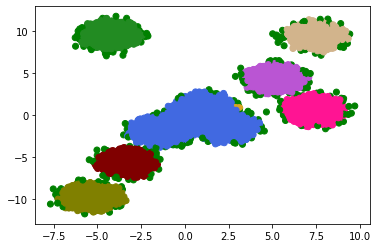

In [534]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(clusters))

In [535]:
cluster_value = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
cluster_value


,0,1,cluster
0,2.099263,-1.031899,0
1,-3.676010,-6.232946,1
2,-3.275697,9.843684,2
3,1.457797,1.114560,0
4,2.220131,-1.775720,0
...,...,...,...
39995,-4.582140,-9.924928,6
39996,2.512774,-1.873069,0
39997,-0.724770,-1.731017,0
39998,2.073208,-1.968624,0


In [536]:
def calculate_member_core_point(cluster_values, cluster_number):
    core_point_arrays = cluster_values.groupby('cluster').get_group(cluster_number).drop('cluster', axis=1).to_numpy()
    core_points = dict()
    for pi in core_point_arrays:
        point = 0
        for pj in core_point_arrays:
            if dist(pi, pj) < eps:
                point += 1
        core_points[point] = pi
    return core_points

# dens_value = dict(sorted(calculate_member_core_point(cluster_value, 0).items(), reverse=True))
# dens_value

In [537]:
def find_center_point(point1, point2):
    n = len(point1)
    result = [0 for i in range(n)]
    for i in range(n):
        result[i] = (point1[i] + point2[i]) / 2
    return [result[i] for i, v in enumerate(result)]

In [538]:
find_center_point([5, 3, 4], [2, 7, 6])

[3.5, 5.0, 5.0]

In [539]:
def compress_data(dens_values):
    final_point = []
    not_check = []
    iterate = 0
    middlePoint = []
    for kpi, pi in dens_values.items():
        middlePoint = pi
        dens = 0
        continues = 0
        for key, check in enumerate(not_check):
            if (pi == check).all():
                continues = 1
                break
        if continues == 1:
            continue
        for kpj, pj in dens_values.items():
            if (dist(middlePoint, pj) < eps and dist(middlePoint, pj) != 0):
                middlePoint = find_center_point(middlePoint, pj)
                not_check.append(pj)
                dens += 1
        print(dens)
        middlePoint = np.append(middlePoint, dens)
        final_point.append(np.ndarray.tolist(np.array(middlePoint)))
    return final_point

In [540]:
all_data = []
for i in range(m.labels_.max() + 1):
    dens_value = dict(sorted(calculate_member_core_point(cluster_value, i).items(), reverse=True))
    all_data.append(compress_data(dens_value))

result = []
for i, vi in enumerate(all_data):
    for j, vj in enumerate(vi):
        result.append(vj)

result

10
8
4
12
11
9
11
4
3
11
2
4
0
5
3
5
5
8
6
4
0
5
6
6
8
7
4
4
6
4
1
5
2
9
1
0
2
4
3
5
2
2
3
3
2
0
6
0
4
2
2
3
3
3
4
0
2
3
1
0
2
2
4
1
1
0
0
3
1
0
4
3
0
2
4
1
1
1
1
3
2
1
1
0
2
1
0
0
2
1
2
4
0
0
0
0
1
3
0
0
0
0
3
3
1
3
3
0
5
1
0
0
1
0
2
0
0
2
0
0
2
0
0
0
2
2
0
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
60
61
61
61
61
61
61
61
47
61
32
41
58
32
43
58
41
41
30
41
31
41
28
57
41
41
34
57
34
31
41
14
14
29
28
27
6
29
15
24
9
18
26
12
11
17
21
9
20
9
3
15
4
5
6
3
3
13
4
6
2
3
5
4
2
2
0
4
1
4
0
3
1
0
0
0
2
0
0
0
4
0
0
2
0
0
1
0
0
0
0
0
0
0
40
41
41
41
38
40
33
39
38
33
20
41
38
30
21
30
27
27
21
26
21
31
29
27
15
31
16
28
15
29
15
31
15
27
13
20
17
22
14
8
18
14
8
16
14
24
13
13
13
13
3
15
15
13
11
15
13
11
3
11
11
11
11
10
3
2
9
6
2
7
4
1
5
2
0
5
2
7
1
2
1
0
1
1
2
2
2
0
0
3
0
0
0
0
0
0
1
0
0
0
0
0
48
49
49
48
49
48
43
46
41
46
48
49
48
41
31
19
19
28
37
16
22
22
48
13
22
29
28
11
27
25
28
12
12
12
21
21
20
12
12
12
18
11
18
18
19
15
19
16
19
10
10
10
5
7
14
13
15
8
11
6
3
8
1
7
6
4
4
3
8
7
3
5
4

[[0.7966471787654531, 0.538783324122819, 10.0],
 [0.49075551472852347, -0.6032044335062039, 8.0],
 [2.383185658716619, -1.6577965703224342, 4.0],
 [-1.1724679999975716, -1.7306680584745868, 12.0],
 [0.7966926177800449, 0.5387771701133411, 11.0],
 [-1.700136905961133, -2.0619363782450804, 9.0],
 [0.79668066304593, 0.5387919976808115, 11.0],
 [1.3185683425048755, 0.9774617258430688, 4.0],
 [1.039920703766716, 1.125637446643891, 3.0],
 [0.7966119890873817, 0.5388819435624763, 11.0],
 [-1.5982459868672487, -1.8978588847045512, 2.0],
 [0.9287603793043427, -0.16064714128874702, 4.0],
 [0.4697370537277879, -0.0019483541060376641, 0.0],
 [0.9517695098608976, -0.14862694973108187, 5.0],
 [0.38656049990745345, -0.30182513921763277, 3.0],
 [2.3869453520026855, -1.653240278983498, 5.0],
 [0.8746438878991627, 0.9771949365705128, 5.0],
 [0.4974899275747889, -0.6004735695095269, 8.0],
 [1.413839088667825, 0.6138928458264621, 6.0],
 [2.5048664300337884, -1.7778325411250475, 4.0],
 [0.48221460410996925

In [541]:
arrays_dens = np.array(result)
arrays_dens

array([[  0.79664718,   0.53878332,  10.        ],
       [  0.49075551,  -0.60320443,   8.        ],
       [  2.38318566,  -1.65779657,   4.        ],
       ...,
       [ -7.25370326, -10.03403558,   0.        ],
       [ -3.47877651,  -9.75643523,   0.        ],
       [  2.94387846,   0.86216864,   2.        ]])

In [542]:
new_dens = arrays_dens[np.where(arrays_dens[:, len(arrays_dens[0, :]) - 1] >= 3)]
new_dens

array([[ 0.79664718,  0.53878332, 10.        ],
       [ 0.49075551, -0.60320443,  8.        ],
       [ 2.38318566, -1.65779657,  4.        ],
       ...,
       [-6.25986804, -9.01883227,  3.        ],
       [-4.16424717, -9.88443499,  3.        ],
       [-4.54837839, -8.873613  ,  3.        ]])

In [543]:
zero_dens = arrays_dens[np.where(arrays_dens[:, len(arrays_dens[0, :]) - 1] < 3)]
zero_dens

array([[-1.59824599e+00, -1.89785888e+00,  2.00000000e+00],
       [ 4.69737054e-01, -1.94835411e-03,  0.00000000e+00],
       [ 4.82214604e-01,  2.93491214e-01,  0.00000000e+00],
       [ 1.36724829e+00,  2.39448596e-01,  1.00000000e+00],
       [ 2.02422122e+00, -1.91900464e+00,  2.00000000e+00],
       [ 2.02415128e+00, -1.52996391e+00,  1.00000000e+00],
       [ 6.13238647e-01,  8.14289802e-01,  0.00000000e+00],
       [ 1.20544128e+00,  4.02269412e-02,  2.00000000e+00],
       [ 2.75166959e+00, -1.64304184e+00,  2.00000000e+00],
       [ 2.02631461e+00, -1.35278864e+00,  2.00000000e+00],
       [ 1.88215031e+00, -1.08840860e+00,  2.00000000e+00],
       [ 2.15249100e+00, -9.70922325e-01,  0.00000000e+00],
       [ 1.76171166e+00, -1.39948326e+00,  0.00000000e+00],
       [ 1.70375702e-01,  2.90032101e-01,  2.00000000e+00],
       [-7.56628126e-01, -1.82445858e+00,  2.00000000e+00],
       [ 7.34150060e-01,  1.23115313e+00,  0.00000000e+00],
       [ 1.51733666e+00,  4.43901398e-01

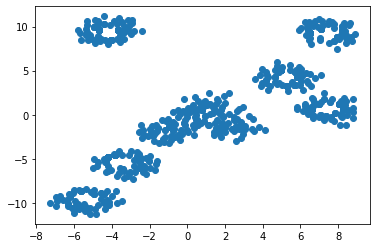

In [544]:
plt.scatter(arrays_dens[:, 0], arrays_dens[:, 1])

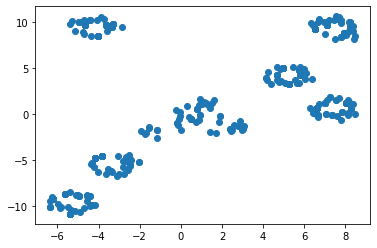

In [545]:
plt.scatter(new_dens[:, 0], new_dens[:, 1])

In [546]:
zero_dens_point = zero_dens[:, 0:len(zero_dens[0, :]) - 1]
zero_dens_point

array([[-1.59824599e+00, -1.89785888e+00],
       [ 4.69737054e-01, -1.94835411e-03],
       [ 4.82214604e-01,  2.93491214e-01],
       [ 1.36724829e+00,  2.39448596e-01],
       [ 2.02422122e+00, -1.91900464e+00],
       [ 2.02415128e+00, -1.52996391e+00],
       [ 6.13238647e-01,  8.14289802e-01],
       [ 1.20544128e+00,  4.02269412e-02],
       [ 2.75166959e+00, -1.64304184e+00],
       [ 2.02631461e+00, -1.35278864e+00],
       [ 1.88215031e+00, -1.08840860e+00],
       [ 2.15249100e+00, -9.70922325e-01],
       [ 1.76171166e+00, -1.39948326e+00],
       [ 1.70375702e-01,  2.90032101e-01],
       [-7.56628126e-01, -1.82445858e+00],
       [ 7.34150060e-01,  1.23115313e+00],
       [ 1.51733666e+00,  4.43901398e-01],
       [ 8.65522298e-01,  1.45744574e+00],
       [ 1.80089570e+00, -1.67881760e+00],
       [-1.80600539e+00, -2.43279989e+00],
       [-8.53621754e-01, -2.36637506e+00],
       [ 3.14452156e-01, -1.12391371e+00],
       [ 1.86735599e+00,  9.17304564e-01],
       [ 1.

In [547]:
delete_values = []
for key, value in enumerate(X):
    for zkey, zval in enumerate(zero_dens_point):
        if dist(zval, value) < eps:
            delete_values.append(value)

remain_values = []
for key, value in enumerate(X):
    length = 0
    for dkey, dval in enumerate(delete_values):
        if (dval != value).all():
            length += 1
    if length == len(delete_values):
        remain_values.append(value)
remain_values = np.array(remain_values)
remain_values

array([[-3.67600986, -6.2329457 ],
       [-3.27569677,  9.84368378],
       [ 1.45779726,  1.11455992],
       ...,
       [-4.58214044, -9.92492753],
       [ 2.51277446, -1.87306889],
       [ 7.7494726 ,  0.88925449]])

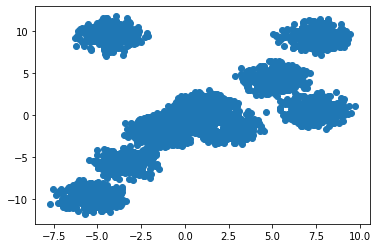

In [548]:
plt.scatter(remain_values[:, 0], remain_values[:, 1])

In [549]:
# neigh = NearestNeighbors(n_neighbors=5)
# nbrs = neigh.fit(remain_values)
# distances, indices = nbrs.kneighbors(remain_values)
# distances = np.sort(distances, axis=0)
# distances = distances[:, 1]
# plt.plot(distances)

In [550]:
# diff = np.array([])
# for key, value in enumerate(distances):
#     if key != len(distances) - 1:
#         diff = np.append(diff, abs(value - distances[key + 1]))
#
# diffStd = diff.std()
#
# for key, value in enumerate(diff):
#     if value > 4 * diffStd:
#         print(key)
#         print(distances[key])
#         eps = distances[key]
#         print("***")
#         break

In [551]:
m = DBSCAN(eps=eps, min_samples=min_pts)
m.fit(remain_values)

DBSCAN(eps=0.21963664268371602, min_samples=200)

In [552]:
final_db_cluster = m.labels_
final_db_cluster

array([-1, -1,  0, ..., -1,  7,  5])

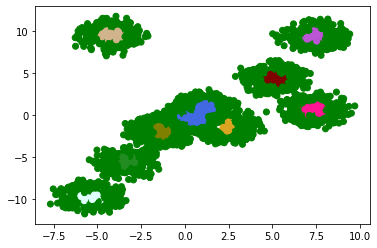

In [553]:
plt.scatter(remain_values[:, 0], remain_values[:, 1], c=vectorizer(final_db_cluster))

In [554]:
dens_cluster_value = pd.concat([pd.DataFrame(remain_values), pd.DataFrame(final_db_cluster, columns=['cluster'])],
                               axis=1)
dens_cluster_value

,0,1,cluster
0,-3.676010,-6.232946,-1
1,-3.275697,9.843684,-1
2,1.457797,1.114560,0
3,2.220131,-1.775720,7
4,5.671494,4.069027,1
...,...,...,...
29918,-5.153248,-9.749700,8
29919,-4.459114,9.715932,4
29920,-4.582140,-9.924928,-1
29921,2.512774,-1.873069,7


In [555]:
def find_center_point_cluster(cluster_values, cluster_number):
    center_points = []
    for i in range(cluster_number):
        mid_point = []
        denses = cluster_values.groupby('cluster').get_group(i).drop('cluster', axis=1).to_numpy()
        for key, value in enumerate(denses):
            if key == 0:
                mid_point = value
            if (key != len(denses)):
                mid_point = find_center_point(mid_point, value)
        center_points.append(mid_point)
    return center_points

center_point =find_center_point_cluster(dens_cluster_value, max(final_db_cluster) + 1)

In [556]:
center_point = np.array(center_point)
center_point

array([[ 0.67732382,  0.17506355],
       [ 4.91307843,  4.31844197],
       [-3.18625974, -5.47617447],
       [ 7.1953728 ,  9.21078697],
       [-4.4454562 ,  9.6855654 ],
       [ 7.58612547,  0.82334265],
       [-1.22058391, -2.01144896],
       [ 2.5178564 , -1.60017005],
       [-5.20881481, -9.79646922]])

In [557]:
kmeans = KMeans(n_clusters=len(center_point), init=center_point, n_init=1)
kmeans.fit(X)
k_clusters = kmeans.labels_
k_clusters

array([7, 2, 4, ..., 6, 7, 5], dtype=int32)

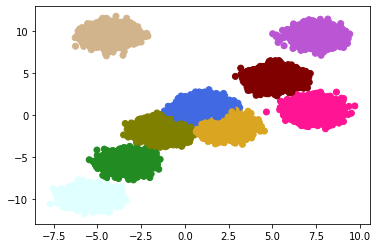

In [558]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(k_clusters))